In [30]:
import networkx as nx
import ndlib.models.epidemics as ep
import ndlib.models.ModelConfig as mc
import matplotlib.pyplot as plt


In [31]:
num_of_nodes = 10

# Barabási-Albert
num_of_edges = 5
ba_graph = nx.barabasi_albert_graph(num_of_nodes, num_of_edges)

# Watts-Strogatz
k_nearest_neighbors = 6
rewiring_probability = 0.1
ws_graph = nx.watts_strogatz_graph(num_of_nodes, k_nearest_neighbors, rewiring_probability)

# Erdős-Rényi
edge_creation_probability = 0.1
er_graph = nx.erdos_renyi_graph(num_of_nodes, edge_creation_probability)

In [32]:
# Parameters to vary
betas = [0.05, 0.1, 0.3]
gammas = [0.005, 0.1]

results = {}

for beta in betas:
    for gamma in gammas:
        config = mc.Configuration()
        config.add_model_parameter('beta', beta)
        config.add_model_parameter('gamma', gamma)
        config.add_model_initial_configuration("Infected", [i for i in range(int(0.1*num_of_nodes))]) # 10% initially infected

        for graph, name in [(ba_graph, "Barabási-Albert"), (ws_graph, "Watts-Strogatz"), (er_graph, "Erdős-Rényi")]:
            model = ep.SIRModel(graph)
            model.set_initial_status(config)
            iterations = model.iteration_bunch(200)
            
            # Store results
            key = (name, beta, gamma)
            results[key] = iterations

NetworkXError: The node 10 is not in the graph.

In [ ]:
def show_visualization(network_name, beta, gamma, time_step):
    if network_name == "Barabási-Albert":
        network = ba_graph
    elif network_name == "Watts-Strogatz":
        network = ws_graph
    elif network_name == "Erdős-Rényi":
        network = er_graph

    current_status = results[(network_name, beta, gamma)][time_step]['status']
    colors = [ "yellow" if current_status.get(node, 0) == 0 
               else "red" if current_status.get(node, 1) == 1 
               else "green" for node in network.nodes() ]

    nx.draw(network, node_color=colors, with_labels=False)
    plt.title(f"{network_name} at time {time_step} with Beta={beta} and Gamma={gamma}")
    plt.show()

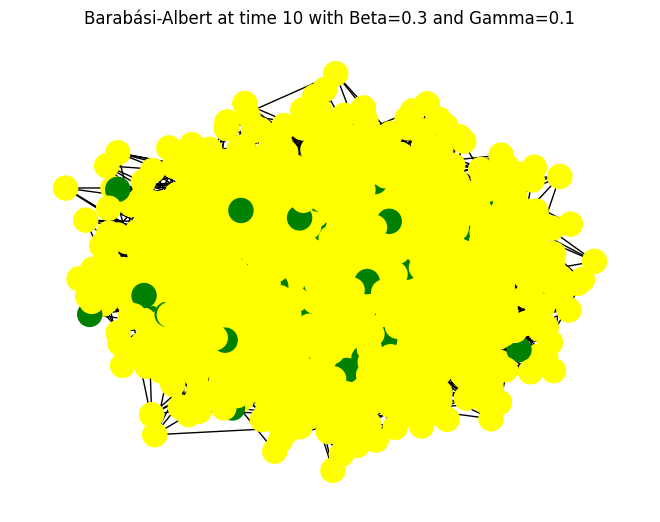

In [ ]:
network_name = "Barabási-Albert"
show_visualization(network_name, 0.3, 0.1, 10)

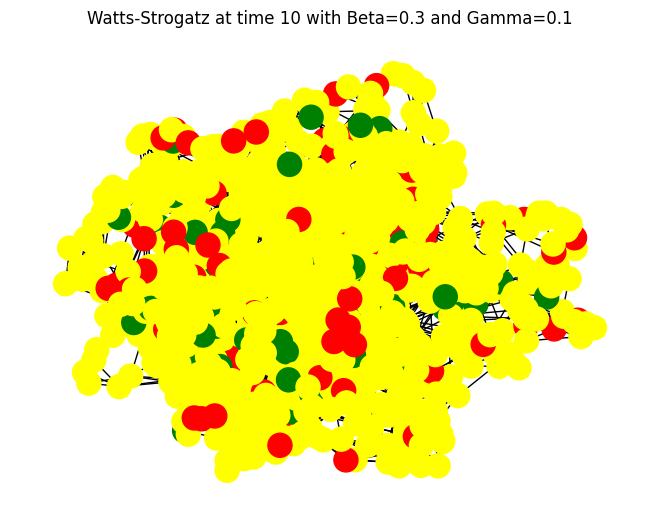

In [ ]:
network_name = "Watts-Strogatz"
show_visualization(network_name, 0.3, 0.1, 10)


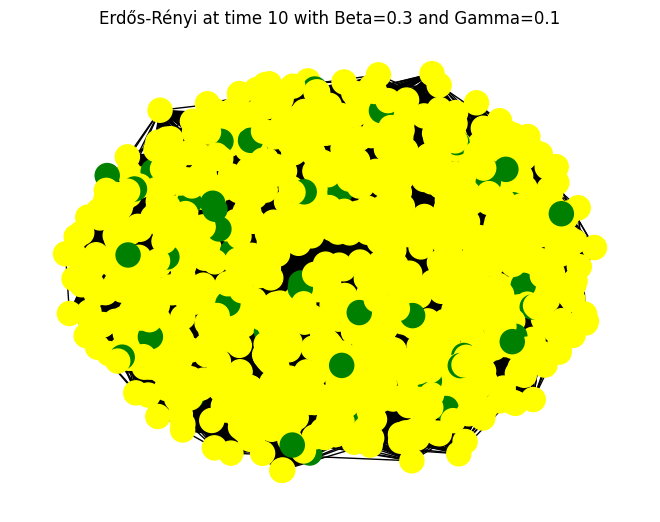

In [ ]:
network_name = "Erdős-Rényi"
show_visualization(network_name, 0.3, 0.1, 10)